# NBA Dashboard

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
data = pd.read_csv('../Data/Player.csv')
data.head()

,season,lg,player,player_id,age,team,pos,g,gs,mp,...,orb,drb,trb,ast,stl,blk,tov,pf,pts,trp_dbl
0,2025,NBA,Precious Achiuwa,achiupr01,25.0,NYK,C,57,10.0,1170.0,...,101.0,216.0,317.0,55,47.0,42.0,45.0,81.0,379,0.0
1,2025,NBA,Steven Adams,adamsst01,31.0,HOU,C,58,3.0,794.0,...,166.0,161.0,327.0,66,22.0,28.0,54.0,60.0,225,0.0
2,2025,NBA,Bam Adebayo,adebaba01,27.0,MIA,C,78,78.0,2674.0,...,185.0,564.0,749.0,337,98.0,53.0,161.0,162.0,1410,1.0
3,2025,NBA,Ochai Agbaji,agbajoc01,24.0,TOR,SG,64,45.0,1739.0,...,61.0,181.0,242.0,98,58.0,30.0,54.0,125.0,667,0.0
4,2025,NBA,Santi Aldama,aldamsa01,24.0,MEM,PF,65,16.0,1660.0,...,94.0,322.0,416.0,188,52.0,29.0,71.0,76.0,811,0.0


1. Remove all the players that is not from the NBA league and Drop Unnecessary Columns()

In [26]:
# Remove all the players that is not from the NBA league
print("Remove all the players that is not from the NBA league:")
print(data['lg'].unique())
NBA_data = data[data['lg'] == 'NBA']
print(NBA_data['lg'].unique())
print("Number of NBA players:", len(NBA_data))
print()

# Remove all the players that does not have a position
print("Remove all the players that does not have a position:")
print(NBA_data['pos'].unique())
NBA_data = NBA_data[NBA_data['pos'].notna()]
print(NBA_data['pos'].unique())
print("Number of players with a position:", len(NBA_data))
print()

# Remove all the players that is not in the current 30 teams
print("Remove all the players that is not in the current 30 teams:")
current_teams = ['ATL', 'BKN', 'BOS', 'CHA', 'CHI', 'CLE', 'DAL', 'DEN', 'DET', 'GSW',
                 'HOU', 'IND', 'LAC', 'LAL', 'MEM', 'MIA', 'MIL', 'MIN', 'NOP', 'NYK',
                 'OKC', 'ORL', 'PHI', 'PHX', 'POR', 'SAC', 'SAS', 'TOR', 'UTA', 'WAS']
print(NBA_data['team'].unique())
NBA_data = NBA_data[NBA_data['team'].isin(current_teams)]
print(NBA_data['team'].unique())
print("Number of players in the current 30 teams:", len(NBA_data))
print()

# Drop Unnecessary Columns(lg, trp_dbl)
NBA_data = NBA_data.drop(columns=['lg', 'trp_dbl'])

NBA_data.head()

Remove all the players that is not from the NBA league:
['NBA' 'ABA' 'BAA']
['NBA']
Number of NBA players: 30386

Remove all the players that does not have a position:
['C' 'SG' 'PF' 'PG' 'SF' nan]
['C' 'SG' 'PF' 'PG' 'SF']
Number of players with a position: 29820

Remove all the players that is not in the current 30 teams:
['NYK' 'HOU' 'MIA' 'TOR' 'MEM' 'MIN' 'DEN' 'PHO' 'CLE' 'NOP' '2TM' 'GSW'
 'MIL' 'ORL' 'LAL' 'POR' 'WAS' 'PHI' 'LAC' 'CHO' 'CHI' 'ATL' 'SAS' 'DET'
 '3TM' 'BRK' 'IND' 'BOS' 'DAL' 'OKC' 'SAC' 'UTA' '4TM' 'CHA' 'NOH' 'NJN'
 'SEA' '5TM' 'NOK' 'CHH' 'VAN' 'WSB' 'KCK' 'SDC' 'NOJ' 'BUF' 'NYN' 'KCO'
 'CAP' 'BAL' 'CIN' 'SDR' 'SFW' 'STL' 'CHZ' 'SYR' 'PHW' 'CHP' 'MNL' 'ROC'
 'FTW' 'MLH' 'BLB' 'INO' 'TRI' 'WSC' 'CHS' 'SHE' 'AND' 'DNN' 'WAT' 'STB']
['NYK' 'HOU' 'MIA' 'TOR' 'MEM' 'MIN' 'DEN' 'CLE' 'NOP' 'GSW' 'MIL' 'ORL'
 'LAL' 'POR' 'WAS' 'PHI' 'LAC' 'CHI' 'ATL' 'SAS' 'DET' 'IND' 'BOS' 'DAL'
 'OKC' 'SAC' 'UTA' 'CHA']
Number of players in the current 30 teams: 21682



,season,player,player_id,age,team,pos,g,gs,mp,fg,...,ft_percent,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,2025,Precious Achiuwa,achiupr01,25.0,NYK,C,57,10.0,1170.0,164,...,0.594,101.0,216.0,317.0,55,47.0,42.0,45.0,81.0,379
1,2025,Steven Adams,adamsst01,31.0,HOU,C,58,3.0,794.0,91,...,0.462,166.0,161.0,327.0,66,22.0,28.0,54.0,60.0,225
2,2025,Bam Adebayo,adebaba01,27.0,MIA,C,78,78.0,2674.0,540,...,0.765,185.0,564.0,749.0,337,98.0,53.0,161.0,162.0,1410
3,2025,Ochai Agbaji,agbajoc01,24.0,TOR,SG,64,45.0,1739.0,266,...,0.708,61.0,181.0,242.0,98,58.0,30.0,54.0,125.0,667
4,2025,Santi Aldama,aldamsa01,24.0,MEM,PF,65,16.0,1660.0,313,...,0.691,94.0,322.0,416.0,188,52.0,29.0,71.0,76.0,811


2. Create New Columns for players stat and rename some colunms

In [31]:
print(len(NBA_data['player'].unique()))

4055


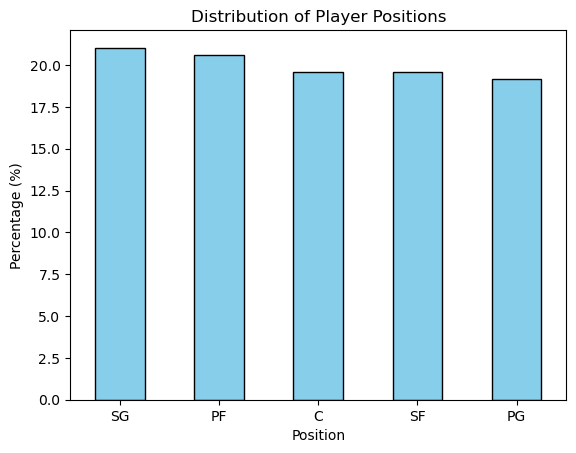

In [30]:
# Count positions, normalize=True gives proportions
pos_counts = data['pos'].value_counts(normalize=True) * 100

# Bar plot
pos_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Labels and title
plt.xlabel("Position")
plt.ylabel("Percentage (%)")
plt.title("Distribution of Player Positions")
plt.xticks(rotation=0)  # keep labels horizontal
plt.show()
